In [0]:
!pip install eli5

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

import eli5
from eli5.sklearn import PermutationImportance

from ast import literal_eval
from tqdm import tqdm_notebook

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [4]:
ls data

shoes_prices.csv


In [0]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
df.shape

(18280, 48)

In [8]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [9]:
[3] *5

[3, 3, 3, 3, 3]

In [10]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

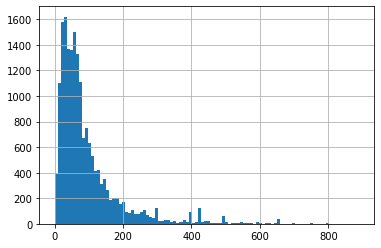

In [11]:
df['prices_amountmin'].hist(bins=100)

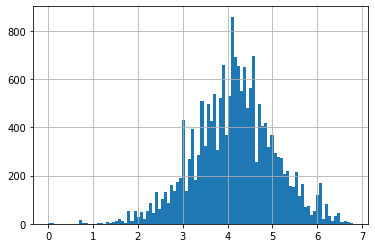

In [12]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [13]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [14]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [15]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [16]:
df.brand.value_counts()

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
Bobux                         1
ONITSUKA TIGER BY ASICS       1
Roundtree & Yorke             1
MO&Y                          1
Carroll Leather               1
Name: brand, Length: 1856, dtype: int64

In [17]:
df.brand.factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [18]:
df['brand_cat'] = df['brand'].factorize()[0]
df.brand_cat

0           0
1           0
2           1
3           1
4           1
         ... 
18275    1855
18276     307
18277     411
18278     411
18279     411
Name: brand_cat, Length: 18280, dtype: int64

In [19]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [20]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth = 5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
# np.mean(scores), np.std(scores)
scores

array([-57.89947522, -57.73227208, -52.50719535, -58.06843816,
       -65.72540391])

In [0]:
def run_model(feats, model = DecisionTreeRegressor(max_depth = 5)):
  X = df[feats].values
  y = df['prices_amountmin'].values

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [23]:
df.manufacturer.value_counts()

Puma              476
Nike              374
New Balance       249
VANS              170
Reebok            128
                 ... 
Steve Madden        1
Old West            1
Urban Pipeline      1
Gola Classics       1
Seiko               1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [25]:
df.colors.value_counts()

Black                                       1364
Brown                                        746
Blue                                         421
Multicolor                                   415
White                                        252
                                            ... 
WhiteUniversity Red-Black-Bright Concord       1
TARNISH                                        1
Cool GreySail                                  1
IndigoBatikCalfnBlue                           1
Brick Red                                      1
Name: colors, Length: 2080, dtype: int64

In [0]:
df['categories_cat'] = df['categories'].factorize()[0]

In [29]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [30]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [31]:
run_model(['categories_cat'])

(-59.82560591635895, 3.4214679298235415)

In [32]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.539304199085976, 4.3112232316154415)

In [33]:
run_model(['brand_cat', 'categories_cat'])

(-58.48960457872586, 6.135642974334146)

In [34]:
run_model(['brand_cat', 'categories_cat', 'manufacturer_cat'])

(-58.32663007803053, 6.222206087396112)

In [133]:
feats = []
for kol in ['asins', 'brand', 'categories', 'colors', 'count', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight']:
  df[kol+'_cat'] = df[kol].factorize()[0]
  feats += [kol + '_cat']
  print(f"{kol:<20}: {str(run_model([kol + '_cat'])):<44}, : {str(run_model(['brand_cat', kol+'_cat'])):<44} : {run_model(feats)}")
      

asins               : (-65.89016871924788, 5.477326258777578)     , : (-58.91922936698976, 3.880112128182612)      : (-65.89016871924788, 5.477326258777578)
brand               : (-58.133398968282776, 4.206122611474276)    , : (-58.133398968282776, 4.206122611474275)     : (-58.91922936698976, 3.8801121281826143)
categories          : (-59.82560591635895, 3.4214679298235415)    , : (-58.46164460070405, 5.740215457979674)      : (-58.27583294565805, 6.006689907391107)
colors              : (-62.72404880129134, 5.053649873215771)     , : (-62.31000245599582, 6.370971641215771)      : (-60.532557091058095, 4.787781882043985)
count               : (-64.00110841258031, 3.605273194168391)     , : (-58.133398968282776, 4.206122611474276)     : (-60.53255709105806, 4.787781882043991)
descriptions        : (-65.75006812541537, 6.362500434229668)     , : (-60.53486159258239, 7.245749103904011)      : (-64.78127261748855, 8.436052919109516)
dimension           : (-63.218177930422144, 4.4848528934

In [36]:
# string padding to fixed length
a = "John"
"{:<15}".format(a)

'John           '

In [37]:
# works also in f-string
a = "John"
f"{a:<20}"

'John                '

In [38]:
# day 5
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [47]:
model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)   # random_state ustawiony na stałe, żeby wyniki były powtarzalne
run_model(['brand_cat'], model )

(-57.47223572384038, 4.328288468270897)

In [49]:
#normalizacja (chyba nie dokładnie, po prostu zamina na małe znaki
df['brand_cat'] = df['brand'].map(lambda x: str(x).lower()).factorize()[0]
run_model(['brand_cat'])

(-58.133398968282776, 4.206122611474276)

In [50]:
model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)   # random_state ustawiony na stałe, żeby wyniki były powtarzalne
run_model(['brand_cat'], model )

(-57.31783843165656, 4.181246596160967)

In [51]:
df.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight,brand_cat,manufacturer_cat,categories_cat,asins_cat,colors_cat,count_cat,descriptions_cat,dimension_cat,ean_cat,features_cat,flavors_cat,imageurls_cat,isbn_cat,keys_cat,manufacturernumber_cat,merchants_cat,name_cat,quantities_cat,reviews_cat,sizes_cat,skus_cat,sourceurls_cat,upc_cat,vin_cat,websiteids_cat,weight_cat
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,True,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN,0,-1,0,-1,-1,-1,0,-1,0,0,-1,0,-1,0,0,0,0,-1,-1,-1,-1,0,0,-1,-1,-1
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN,0,-1,0,-1,-1,-1,0,-1,0,0,-1,0,-1,0,0,0,0,-1,-1,-1,-1,0,0,-1,-1,-1
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,1,-1,1,1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Stu

In [52]:
df.features

0        [{"key":"Gender","value":["Men"]},{"key":"Shoe...
1        [{"key":"Gender","value":["Men"]},{"key":"Shoe...
2        [{"key":"Gender","value":["Men"]},{"key":"Colo...
3        [{"key":"Gender","value":["Men"]},{"key":"Colo...
4        [{"key":"Gender","value":["Men"]},{"key":"Colo...
                               ...                        
18275    [{"key":"Style","value":["Desert Boots"]},{"ke...
18276    [{"key":"Shoe Size","value":["9.5"]},{"key":"G...
18277    [{"key":"Gender","value":["Unisex"]},{"key":"F...
18278    [{"key":"Gender","value":["Unisex"]},{"key":"F...
18279    [{"key":"Gender","value":["Unisex"]},{"key":"F...
Name: features, Length: 18280, dtype: object

In [53]:
df.features.head().values

array(['[{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["M"]},{"key":"Shoe Category","value":["Men\'s Shoes"]},{"key":"Color","value":["Multicolor"]},{"key":"Manufacturer Part Number","value":["8190-W-NAVY-7.5"]},{"key":"Brand","value":["Josmo"]}]',
       '[{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["M"]},{"key":"Shoe Category","value":["Men\'s Shoes"]},{"key":"Color","value":["Multicolor"]},{"key":"Manufacturer Part Number","value":["8190-W-NAVY-7.5"]},{"key":"Brand","value":["Josmo"]}]',
       '[{"key":"Gender","value":["Men"]},{"key":"Color","value":["Black"]},{"key":"Shipping Weight (in pounds)","value":["0.45"]},{"key":"Condition","value":["New"]},{"key":"Brand","value":["SERVUS BY HONEYWELL"]},{"key":"manufacturer_part_number","value":["ZSR101BLMLG"]}]',
       '[{"key":"Gender","value":["Men"]},{"key":"Color","value":["Black"]},{"key":"Shipping Weight (in pounds)","value":["0.45"]},{"key":"Condition","value":["New"]},{"key":"Brand","value":["SER

In [56]:
str_dict = '[{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["M"]},{"key":"Shoe Category","value":["Men\'s Shoes"]},{"key":"Color","value":["Multicolor"]},{"key":"Manufacturer Part Number","value":["8190-W-NAVY-7.5"]},{"key":"Brand","value":["Josmo"]}]'

literal_eval(str_dict)

[{'key': 'Gender', 'value': ['Men']},
 {'key': 'Shoe Size', 'value': ['M']},
 {'key': 'Shoe Category', 'value': ["Men's Shoes"]},
 {'key': 'Color', 'value': ['Multicolor']},
 {'key': 'Manufacturer Part Number', 'value': ['8190-W-NAVY-7.5']},
 {'key': 'Brand', 'value': ['Josmo']}]

In [0]:
def parse_features(x):
  output_dict = {}
  if str(x) == 'nan': return output_dict

  features = literal_eval(x.replace('\\"', '"'))
  for item in features:
    key = item['key'].lower().strip()
    value = item['value'][0].lower().strip()

    output_dict[key] = value

  return output_dict

df['features_parsed'] = df['features'].map(parse_features)

In [78]:
df['features_parsed'].head()[0].keys()

dict_keys(['gender', 'shoe size', 'shoe category', 'color', 'manufacturer part number', 'brand'])

In [79]:
# pobranie wszystich kluczy, poprzez wrzucenie do set, który ma unikalne wartości
keys = set()

df['features_parsed'].map(lambda x: keys.update(x.keys()))

len(keys)

476

In [116]:
def get_name_feat(key):
  return 'feat_' + key

for key in tqdm_notebook(keys):
  df[get_name_feat(key)] = df.features_parsed.map(lambda feats: feats[key] if key in feats else np.nan)

In [84]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension',
       ...
       'feat_subdial', 'feat_product #', 'feat_front', 'feat_crown',
       'feat_autographed', 'feat_general warranty', 'feat_jacket length',
       'feat_dial color', 'feat_material', 'feat_age end'],
      dtype='object', length=551)

In [87]:
df[False == df['feat_athlete'].isnull() ].shape[0]/ df.shape[0] * 100   #cecha not null w 4%, mało

0.0437636761487965

In [0]:
keys_stat = {}
for key in keys:
  keys_stat[key] = df[False == df[get_name_feat(key)].isnull() ].shape[0]/ df.shape[0] * 100   #cecha not null w 4%, mało


In [91]:
keys_stat

{'100% adidas authentic': 0.005470459518599562,
 'accessory type': 0.1422319474835886,
 'adidas': 0.005470459518599562,
 'adjustable': 0.34463894967177244,
 'age': 0.6400437636761488,
 'age end': 0.4431072210065646,
 'age gender group': 0.12582056892778995,
 'age group': 27.64770240700219,
 'age range': 0.5470459518599562,
 'age segment': 0.1422319474835886,
 'age start': 0.4431072210065646,
 'airport friendly': 0.005470459518599562,
 'alarm': 0.23522975929978115,
 'amazonbestsellersrank': 0.06017505470459519,
 'animal type': 0.005470459518599562,
 'antiscratch lens coating': 0.005470459518599562,
 'applicable': 0.02188183807439825,
 'arm': 0.6236323851203501,
 'article': 0.005470459518599562,
 'assembled in country of origin': 2.199124726477024,
 'assembled product dimensions (l x w x h)': 10.300875273522976,
 'assembled product weight': 1.5536105032822756,
 'athlete': 0.0437636761487965,
 'atpv arc rating': 0.005470459518599562,
 'attachment': 0.03282275711159737,
 'audience': 0.2352

In [110]:
{k:v for k,v in keys_stat.items() if v>30}

{'brand': 48.62691466083151,
 'color': 47.784463894967175,
 'gender': 50.17505470459519,
 'manufacturer part number': 36.252735229759296,
 'material': 34.9070021881838}

In [96]:
#porównanie brand wyciągnietego z features z tym wprost
df['brand'] = df['brand'].map(lambda x: str(x).lower())  #zamiana na małe litery, bo w features to zrobiliśmy
df[ df.brand == df.feat_brand ].shape

(8846, 551)

In [0]:
df['color']

In [120]:
for key in ['brand', 'color', 'gender', 'manufacturer part number', 'material']:
  df[get_name_feat(key)+'_cat'] = df[get_name_feat(key)].map(lambda x: str(x).lower()).factorize()[0]
  print(get_name_feat(key)+'_cat')

feat_brand_cat
feat_color_cat
feat_gender_cat
feat_manufacturer part number_cat
feat_material_cat


In [166]:
#feats_cat = [x for x in df.columns if '_cat' in x]
feats_cat = [x for x in df.columns if x[-4:] == '_cat']
feats_cat

['brand_cat',
 'manufacturer_cat',
 'categories_cat',
 'asins_cat',
 'colors_cat',
 'count_cat',
 'descriptions_cat',
 'dimension_cat',
 'ean_cat',
 'features_cat',
 'flavors_cat',
 'imageurls_cat',
 'isbn_cat',
 'keys_cat',
 'manufacturernumber_cat',
 'merchants_cat',
 'name_cat',
 'quantities_cat',
 'reviews_cat',
 'sizes_cat',
 'skus_cat',
 'sourceurls_cat',
 'upc_cat',
 'vin_cat',
 'websiteids_cat',
 'weight_cat',
 'feat_brand_cat',
 'feat_color_cat',
 'feat_gender_cat',
 'feat_manufacturer part number_cat',
 'feat_material_cat']

In [167]:
feats = ['brand_cat','categories_cat','colors_cat']
feats += feats_cat
print(len(feats))
feats = list(set(feats))  # unikalna lista
print(len(feats))
feats

34
31


['feat_gender_cat',
 'skus_cat',
 'colors_cat',
 'quantities_cat',
 'reviews_cat',
 'merchants_cat',
 'descriptions_cat',
 'dimension_cat',
 'name_cat',
 'count_cat',
 'isbn_cat',
 'upc_cat',
 'flavors_cat',
 'ean_cat',
 'feat_material_cat',
 'sizes_cat',
 'feat_manufacturer part number_cat',
 'sourceurls_cat',
 'keys_cat',
 'manufacturer_cat',
 'weight_cat',
 'manufacturernumber_cat',
 'categories_cat',
 'brand_cat',
 'vin_cat',
 'feat_brand_cat',
 'imageurls_cat',
 'features_cat',
 'websiteids_cat',
 'feat_color_cat',
 'asins_cat']

In [0]:
feats = ['brand_cat'
,'merchants_cat'
,'categories_cat'
,'feat_gender_cat'
,'colors_cat'
,'asins_cat'
,'feat_material_cat'
,'manufacturer_cat'
,'name_cat'
]

In [204]:
model = RandomForestRegressor(max_depth=150, n_estimators=100, random_state=0)   # random_state ustawiony na stałe, żeby wyniki były powtarzalne
# zmiana max_depth poprawiła wynik, ale liczy się znacznie dłużej
result = run_model(feats , model )
result

(-52.78762134585637, 8.958813902988055)

In [205]:

X = df[feats].values
y = df['prices_amountmin'].values

m = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)   # random_state ustawiony na stałe, żeby wyniki były powtarzalne
m.fit(X,y)

print(result)

perm = PermutationImportance(m, random_state = 1).fit(X,y);
eli5.show_weights(perm, feature_names = feats)


(-52.78762134585637, 8.958813902988055)


Weight,Feature
0.1343 ± 0.0095,brand_cat
0.1244 ± 0.0065,colors_cat
0.0825 ± 0.0055,feat_material_cat
0.0473 ± 0.0055,feat_gender_cat
0.0202 ± 0.0030,asins_cat
0.0176 ± 0.0015,categories_cat
0.0152 ± 0.0006,name_cat
0.0025 ± 0.0003,manufacturer_cat
0.0019 ± 0.0003,merchants_cat


In [207]:
# ale i tak najlepszy wynik daje większa głębokość i jedna cecha, ciekawe
model = RandomForestRegressor(max_depth=150, n_estimators=100, random_state=0)   # random_state ustawiony na stałe, żeby wyniki były powtarzalne
# zmiana max_depth poprawiła wynik, ale liczy się znacznie dłużej
result = run_model(['brand_cat'] , model )
result

(-45.7996913742448, 3.24886905887665)